#変数

In [34]:
import numpy as np

Σ xnyn　/ Σ xn**
yc * xc / xc * xc
xy.sum() / xx.sum()


In [35]:
#ベクトルの定義
x = np.array([1,2,3])

In [36]:
x


array([1, 2, 3])

In [37]:
y = np.array([2,3.9,6.1])

In [38]:
y

array([ 2. ,  3.9,  6.1])

データの中心化


In [39]:
# 平均の算出
x.mean()

2.0

In [40]:
y.mean()

4.0

In [41]:
xc = x -x.mean()

In [42]:
xc

array([-1.,  0.,  1.])

In [43]:
yc = y- y.mean()

In [44]:
yc

array([-2. , -0.1,  2.1])

パラメータの計算


In [48]:
# 要素ごとの掛け算（要素積)
xx = xc * xc

In [49]:
xx

array([ 1.,  0.,  1.])

In [54]:
xy = yc * xc

In [55]:
xy

array([ 2. , -0. ,  2.1])

In [56]:
xx.sum()

2.0

In [57]:
xy.sum()

4.0999999999999996

In [59]:
a = xy.sum() / xx.sum()

In [60]:
a

2.0499999999999998

Pandas:データベースの操作

In [62]:
import pandas as pd

In [63]:
# CSVファイルの読込み
df = pd.read_csv('sample.csv')

In [66]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [67]:
# データの抽出
x = df['x']
y = df['y']

Matplotlib:グラフの描画


In [70]:
import matplotlib.pyplot as plt

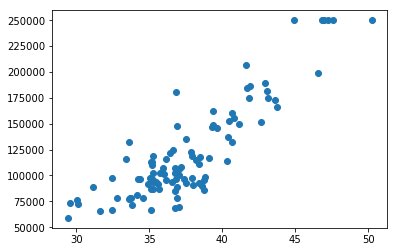

In [75]:
# 散布図(scatter)　横軸をx 縦軸をyをプロット
plt.scatter(x,y)
plt.show()

単回帰分析の実装

In [76]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [77]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [83]:
# 中心化
df_c = df - df.mean()

In [80]:
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [81]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.918465e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [85]:
# データのの抽出
x = df_c['x']
y = df_c['y']

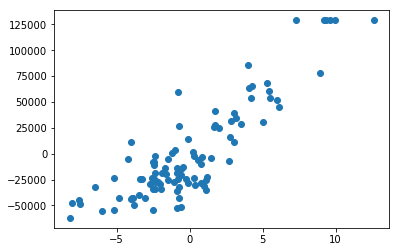

In [86]:
# xとyの散布図をプロット
plt.scatter(x,y)
plt.show()

パラメータ　aの計算


In [87]:
xx = x * x

In [88]:
xy = x * y

In [89]:
a = xy.sum() / xx.sum()

In [90]:
a


10069.022519284063

プロットして確認


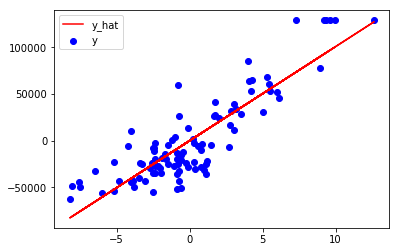

In [96]:
plt.scatter(x,y,label='y',color='blue') #実測値
plt.plot(x,a*x,label='y_hat',color='red') #予測値
plt.legend() #凡例の表示
plt.show()

予測値の計算
   y - yの平均 = a(x - xの平均)
   → y = a(x - xの平均) + yの平均
   
   \begin{equation}
   \hat{y} = a(x - \bar{x})+ \bar{y}
   \end{equation}
   

In [97]:
x_new = 40 #40平米

In [98]:
mean = df.mean()

In [99]:
mean

x        37.62222
y    121065.00000
dtype: float64

In [100]:
mean['x']

37.622219999999999

In [101]:
#中心化
xc = x_new - mean['x']

In [102]:
xc

2.3777800000000013

In [104]:
#単回帰分析による予測値の計算
y = a * xc

In [105]:
y

23941.920365903272

In [106]:
# 元のスケールの予測値
y_hat = a * xc + mean['y']

In [107]:
y_hat

145006.92036590326

予測値を計算する関数の作成

In [111]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.622219999999999
    ym = 121065.0
    # 中心化
    xc = x -xm
    # 予測値の計算
    y_hat = a * xc + ym
    # 出力する
    return y_hat
    

In [116]:
# 予測値
predict(40)

145006.92036590326

In [114]:
predict(30)

44316.695173062646

In [115]:
predict(25) #外挿の値

-6028.417423357663

$ \sum^{N}_{n=1}(x_{n}y_{n}) $

$ \sum^{N}_{n=1}(x_{n}^2 ) $

## $a = \frac{ \sum^{N}_{n=1}(x_{n}y_{n}) }{ \sum^{N}_{n=1}(x_{n}^2 ) }$